In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# pd.read_excel('프로젝트 엑셀 데이터/광주광역시 가구평균 월사용량/가구 평균 월별 전력사용량_2021.01~06.xls')

df_1 = pd.concat([pd.read_excel('프로젝트 엑셀 데이터/광주광역시 가구평균 월사용량(19_20)/가구 평균 월별 전력사용량_2019.01~06.xls'),
           pd.read_excel('프로젝트 엑셀 데이터/광주광역시 가구평균 월사용량(19_20)/가구 평균 월별 전력사용량_2019.07~12.xls'),
           pd.read_excel('프로젝트 엑셀 데이터/광주광역시 가구평균 월사용량(19_20)/가구 평균 월별 전력사용량_2020.01~06.xls'),
           pd.read_excel('프로젝트 엑셀 데이터/광주광역시 가구평균 월사용량(19_20)/가구 평균 월별 전력사용량_2020.07~12.xls'),
           pd.read_excel('프로젝트 엑셀 데이터/광주광역시 가구평균 월사용량/가구 평균 월별 전력사용량_2021.01~06.xls'),
           pd.read_excel('프로젝트 엑셀 데이터/광주광역시 가구평균 월사용량/가구 평균 월별 전력사용량_2021.07~12.xls'),
           pd.read_excel('프로젝트 엑셀 데이터/광주광역시 가구평균 월사용량/가구 평균 월별 전력사용량_2022.01~06.xls'),
           pd.read_excel('프로젝트 엑셀 데이터/광주광역시 가구평균 월사용량/가구 평균 월별 전력사용량_2022.07~12.xls')],
         ignore_index=True)

In [3]:
df_1['대상가구수(호)'].replace(',', '',regex=True, inplace = True)
df_1['대상가구수(호)'] = df_1['대상가구수(호)'].astype('int64')

In [4]:
df_1['전력 사용량(kWh)'] = df_1['대상가구수(호)']*df_1['가구당 평균 전력 사용량(kWh)']

In [5]:
df_1.dtypes

년월                     int64
시도                    object
시군구                   object
대상가구수(호)               int64
가구당 평균 전력 사용량(kWh)     int64
가구당 평균 전기요금(원)        object
전력 사용량(kWh)            int64
dtype: object

In [6]:
df_1['년월'] = df_1['년월'].astype(str)

In [7]:
year = df_1['년월'].apply(lambda x : x[:4])
month = df_1['년월'].apply(lambda x : x[4:])

In [8]:
df_1['년']=year
df_1['월']=month

In [9]:
kwh19_df = df_1.loc[df_1['년']=='2019'][['년', '월','가구당 평균 전력 사용량(kWh)']].groupby('월').mean().reset_index()
kwh20_df = df_1.loc[df_1['년']=='2020'][['년', '월','가구당 평균 전력 사용량(kWh)']].groupby('월').mean().reset_index()
kwh21_df = df_1.loc[df_1['년']=='2021'][['년', '월','가구당 평균 전력 사용량(kWh)']].groupby('월').mean().reset_index()
kwh22_df = df_1.loc[df_1['년']=='2022'][['년', '월','가구당 평균 전력 사용량(kWh)']].groupby('월').mean().reset_index()

In [10]:
kwh21_df,kwh22_df,kwh19_df,kwh20_df

(     월  가구당 평균 전력 사용량(kWh)
 0   01               256.6
 1   02               247.8
 2   03               215.4
 3   04               221.6
 4   05               210.0
 5   06               218.4
 6   07               247.8
 7   08               327.2
 8   09               265.4
 9   10               222.8
 10  11               223.0
 11  12               226.8,
      월  가구당 평균 전력 사용량(kWh)
 0   01               246.2
 1   02               245.8
 2   03               218.2
 3   04               222.6
 4   05               203.0
 5   06               211.8
 6   07               267.2
 7   08               316.2
 8   09               271.8
 9   10               215.6
 10  11               212.8
 11  12               223.6,
      월  가구당 평균 전력 사용량(kWh)
 0   01               237.8
 1   02               235.8
 2   03               206.4
 3   04               217.0
 4   05               203.2
 5   06               205.2
 6   07               215.2
 7   08               289.4
 8   09           

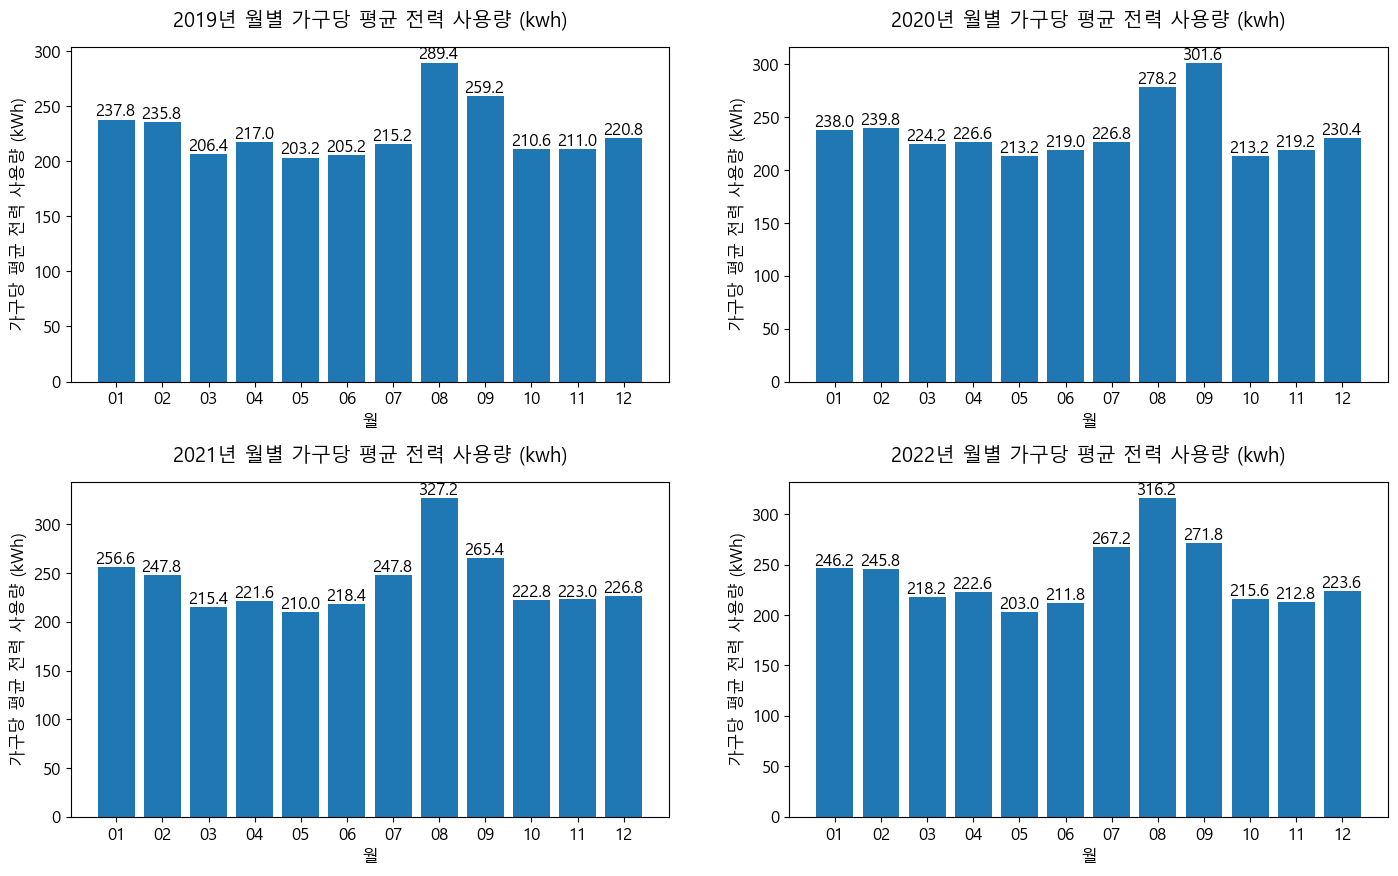

In [11]:
plt.figure(figsize=(17,10))
plt.subplots_adjust(hspace=0.3)
plt.subplot(2,2,1)
plt.bar(kwh19_df['월'],kwh19_df['가구당 평균 전력 사용량(kWh)'])
plt.title('2019년 월별 가구당 평균 전력 사용량 (kwh)',pad = 15)
plt.xlabel('월')
plt.ylabel('가구당 평균 전력 사용량 (kWh)')
for i, v in enumerate(kwh19_df['가구당 평균 전력 사용량(kWh)']):
    plt.text(i-0.45, v + 3, v)

plt.subplot(2,2,2)
plt.bar(kwh20_df['월'],kwh20_df['가구당 평균 전력 사용량(kWh)'])
plt.title('2020년 월별 가구당 평균 전력 사용량 (kwh)',pad = 15)
plt.xlabel('월')
plt.ylabel('가구당 평균 전력 사용량 (kWh)')
for i, v in enumerate(kwh20_df['가구당 평균 전력 사용량(kWh)']):
    plt.text(i-0.45, v + 3, v)

plt.subplot(2,2,3)
plt.bar(kwh21_df['월'],kwh21_df['가구당 평균 전력 사용량(kWh)'])
plt.title('2021년 월별 가구당 평균 전력 사용량 (kwh)',pad = 15)
plt.xlabel('월')
plt.ylabel('가구당 평균 전력 사용량 (kWh)')
for i, v in enumerate(kwh21_df['가구당 평균 전력 사용량(kWh)']):
    plt.text(i-0.45, v + 3, v)

plt.subplot(2,2,4)
plt.bar(kwh22_df['월'],kwh22_df['가구당 평균 전력 사용량(kWh)'])
plt.title('2022년 월별 가구당 평균 전력 사용량 (kwh)',pad = 15)
plt.xlabel('월')
plt.ylabel('가구당 평균 전력 사용량 (kWh)')
for i, v in enumerate(kwh22_df['가구당 평균 전력 사용량(kWh)']):
    plt.text(i-0.45, v + 3, v)
plt.show()

In [ ]:
df.loc[df['13']]

In [12]:
df_2 = pd.concat([pd.read_excel('프로젝트 엑셀 데이터/광주광역시 용도별 월사용량(19_20)/계약종별 전력사용량 월별_2019.01~06.xls'),
           pd.read_excel('프로젝트 엑셀 데이터/광주광역시 용도별 월사용량(19_20)/계약종별 전력사용량 월별_2019.07~12.xls'),
           pd.read_excel('프로젝트 엑셀 데이터/광주광역시 용도별 월사용량(19_20)/계약종별 전력사용량 월별_2020.01~06.xls'),
           pd.read_excel('프로젝트 엑셀 데이터/광주광역시 용도별 월사용량(19_20)/계약종별 전력사용량 월별_2020.07~12.xls'),
           pd.read_excel('프로젝트 엑셀 데이터/광주광역시 용도별 월사용량/계약종별 전력사용량 월별_2021.01~06.xls'),
           pd.read_excel('프로젝트 엑셀 데이터/광주광역시 용도별 월사용량/계약종별 전력사용량 월별_2021.07~12.xls'),
           pd.read_excel('프로젝트 엑셀 데이터/광주광역시 용도별 월사용량/계약종별 전력사용량 월별_2022.01~06.xls'),
           pd.read_excel('프로젝트 엑셀 데이터/광주광역시 용도별 월사용량/계약종별 전력사용량 월별_2022.07~12.xls')],
         ignore_index=True)

In [32]:
df_2

,년월,시구,시군구,계약구분,고객호수(호),사용량(kWh),전기요금(원),평균판매단가(원/kWh),고객당 평균 전력 사용량(kWh),년,월
0,201901,광주광역시,광산구,가로등,11891,2660449,"288,886,605",108.6,223.7,2019,01
1,201901,광주광역시,광산구,교육용,164,6741847,"699,917,616",103.8,41108.8,2019,01
2,201901,광주광역시,광산구,농사용,5739,6108046,"284,320,122",46.5,1064.3,2019,01
3,201901,광주광역시,광산구,산업용,3083,176730544,"22,196,237,782",125.6,57324.2,2019,01
4,201901,광주광역시,광산구,심 야,1463,3610824,"263,009,079",72.8,2468.1,2019,01
...,...,...,...,...,...,...,...,...,...,...,...
1915,202212,광주광역시,서구,산업용,684,26773505,"4,076,579,360",152.3,39142.6,2022,12
1916,202212,광주광역시,서구,심 야,699,1273849,"122,462,022",96.1,1822.4,2022,12
1917,202212,광주광역시,서구,일반용,20502,63473543,"10,215,853,633",160.9,3096.0,2022,12
1918,202212,광주광역시,서구,주택용,76911,35741374,"4,461,869,338",124.8,464.7,2022,12


In [14]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920 entries, 0 to 1919
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   년월             1920 non-null   int64  
 1   시구             1920 non-null   object 
 2   시군구            1920 non-null   object 
 3   계약구분           1920 non-null   object 
 4   고객호수(호)        1920 non-null   object 
 5   사용량(kWh)       1920 non-null   object 
 6   전기요금(원)        1920 non-null   object 
 7   평균판매단가(원/kWh)  1920 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 120.1+ KB


In [15]:
df_2['고객호수(호)'].replace(',', '',regex=True, inplace = True)
df_2['고객호수(호)'] = df_2['고객호수(호)'].astype('int64')
df_2['사용량(kWh)'].replace(',', '',regex=True, inplace = True)
df_2['사용량(kWh)'] = df_2['사용량(kWh)'].astype('int64')

In [16]:
df_2['고객당 평균 전력 사용량(kWh)'] = np.round(df_2['사용량(kWh)']/df_2['고객호수(호)'],1)

In [17]:
df_2

,년월,시구,시군구,계약구분,고객호수(호),사용량(kWh),전기요금(원),평균판매단가(원/kWh),고객당 평균 전력 사용량(kWh)
0,201901,광주광역시,광산구,가로등,11891,2660449,"288,886,605",108.6,223.7
1,201901,광주광역시,광산구,교육용,164,6741847,"699,917,616",103.8,41108.8
2,201901,광주광역시,광산구,농사용,5739,6108046,"284,320,122",46.5,1064.3
3,201901,광주광역시,광산구,산업용,3083,176730544,"22,196,237,782",125.6,57324.2
4,201901,광주광역시,광산구,심 야,1463,3610824,"263,009,079",72.8,2468.1
...,...,...,...,...,...,...,...,...,...
1915,202212,광주광역시,서구,산업용,684,26773505,"4,076,579,360",152.3,39142.6
1916,202212,광주광역시,서구,심 야,699,1273849,"122,462,022",96.1,1822.4
1917,202212,광주광역시,서구,일반용,20502,63473543,"10,215,853,633",160.9,3096.0
1918,202212,광주광역시,서구,주택용,76911,35741374,"4,461,869,338",124.8,464.7


In [18]:
df_2['년월'] = df_2['년월'].astype(str)

In [19]:
year = df_2['년월'].apply(lambda x : x[:4])
month = df_2['년월'].apply(lambda x : x[4:])

In [20]:
df_2['년']=year
df_2['월']=month

In [21]:
kwh19_df2 = df_2.loc[df_2['년']=='2019'][['년','월','계약구분','고객당 평균 전력 사용량(kWh)']].pivot_table(index=['월'], columns='계약구분', values = '고객당 평균 전력 사용량(kWh)')
kwh19_df2 = kwh19_df2[['가로등', '교육용', '농사용', '산업용', '심 야', '일반용', '주택용']]
kwh20_df2 = df_2.loc[df_2['년']=='2020'][['년','월','계약구분','고객당 평균 전력 사용량(kWh)']].pivot_table(index=['월'], columns='계약구분', values = '고객당 평균 전력 사용량(kWh)')
kwh20_df2 = kwh20_df2[['가로등', '교육용', '농사용', '산업용', '심 야', '일반용', '주택용']]
kwh21_df2 = df_2.loc[df_2['년']=='2021'][['년','월','계약구분','고객당 평균 전력 사용량(kWh)']].pivot_table(index=['월'], columns='계약구분', values = '고객당 평균 전력 사용량(kWh)')
kwh21_df2 = kwh21_df2[['가로등', '교육용', '농사용', '산업용', '심 야', '일반용', '주택용']]
kwh22_df2 = df_2.loc[df_2['년']=='2022'][['년','월','계약구분','고객당 평균 전력 사용량(kWh)']].pivot_table(index=['월'], columns='계약구분', values = '고객당 평균 전력 사용량(kWh)')
kwh22_df2 = kwh22_df2[['가로등', '교육용', '농사용', '산업용', '심 야', '일반용', '주택용']]

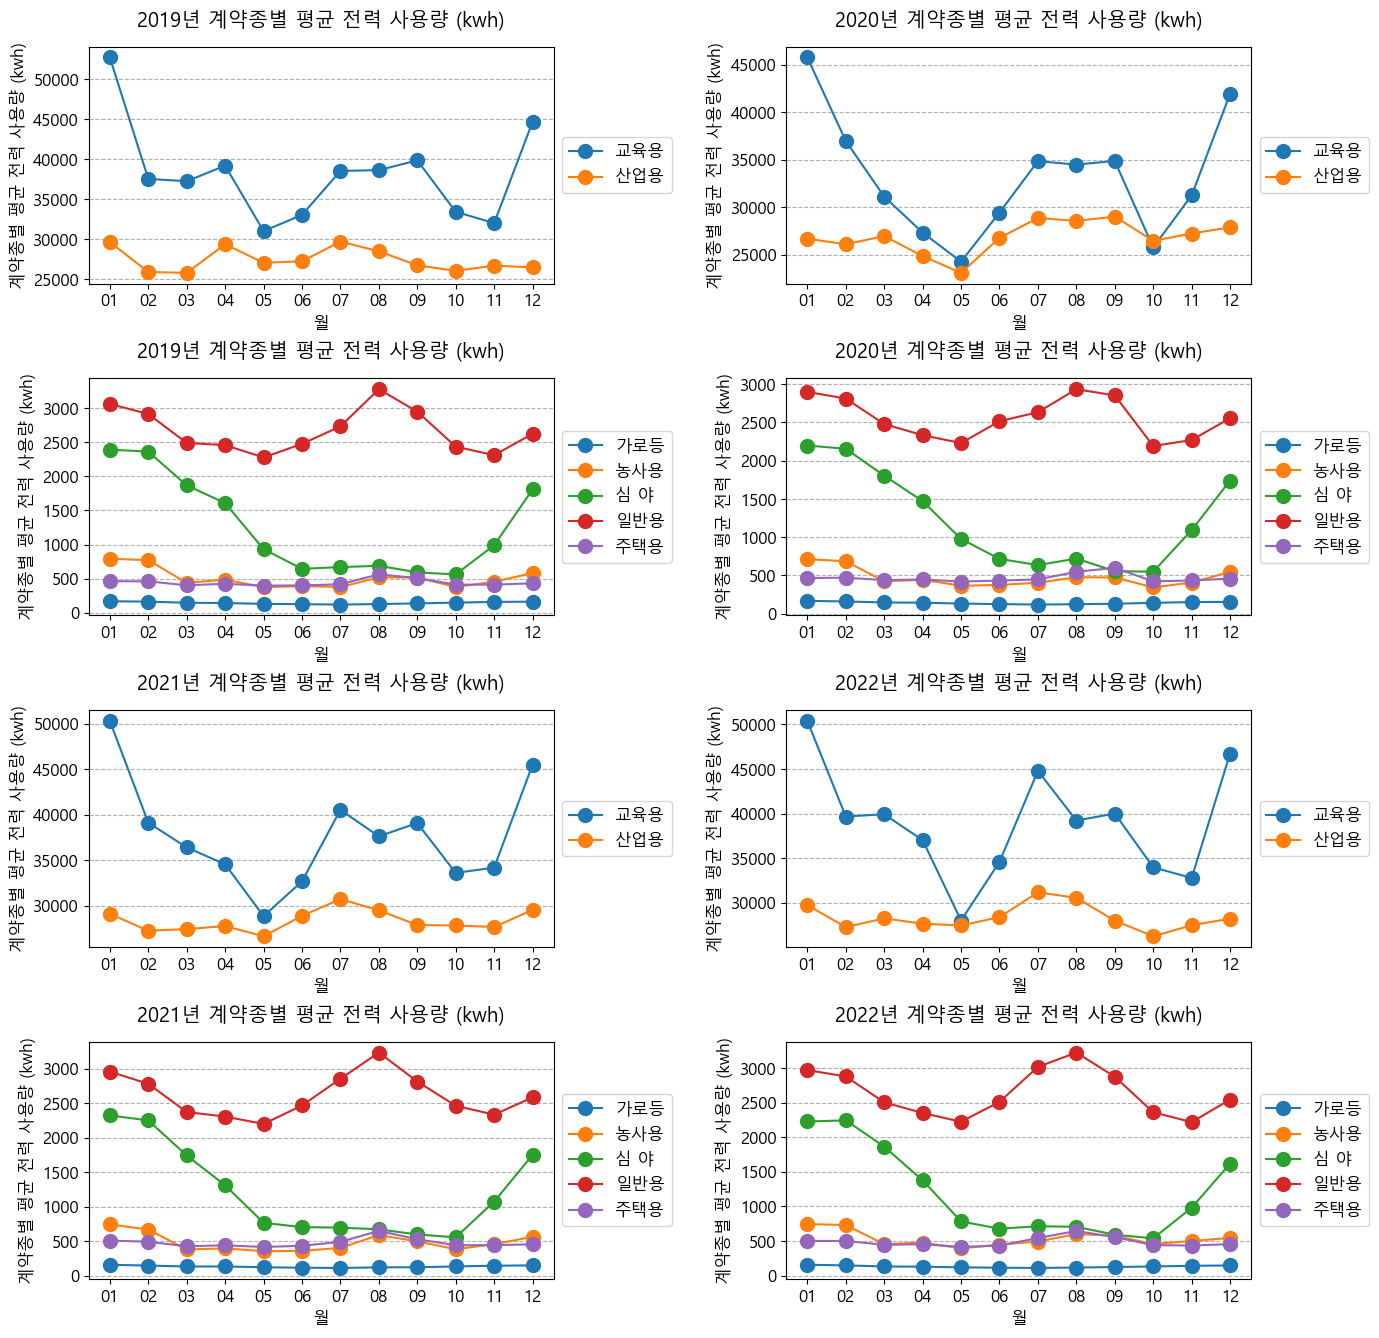

In [22]:
plt.figure(figsize=(15,16))

plt.subplot(4,2,1)
plt.subplots_adjust(wspace=0.5, hspace=0.4)
plt.plot(kwh19_df2[['교육용','산업용']], marker = 'o', markersize=10)
plt.title('2019년 계약종별 평균 전력 사용량 (kwh)',pad = 15)
plt.xlabel('월')
plt.ylabel('계약종별 평균 전력 사용량 (kwh)')
plt.legend(kwh19_df2[['교육용','산업용']].columns,loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(axis='y', linestyle='--', alpha=1)

plt.subplot(4,2,2)
plt.plot(kwh20_df2[['교육용','산업용']], marker = 'o', markersize=10)
plt.title('2020년 계약종별 평균 전력 사용량 (kwh)',pad = 15)
plt.xlabel('월')
plt.ylabel('계약종별 평균 전력 사용량 (kwh)')
plt.legend(kwh20_df2[['교육용','산업용']].columns,loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(axis='y', linestyle='--', alpha=1)

plt.subplot(4,2,3)
plt.subplots_adjust(wspace=0.5)
plt.plot(kwh19_df2[['가로등', '농사용', '심 야', '일반용', '주택용']], marker = 'o', markersize=10)
plt.title('2019년 계약종별 평균 전력 사용량 (kwh)',pad = 15)
plt.xlabel('월')
plt.ylabel('계약종별 평균 전력 사용량 (kwh)')
plt.legend(kwh19_df2[['가로등', '농사용', '심 야', '일반용', '주택용']].columns,loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(axis='y', linestyle='--', alpha=1)

plt.subplot(4,2,4)
plt.subplots_adjust(wspace=0.5)
plt.plot(kwh20_df2[['가로등', '농사용', '심 야', '일반용', '주택용']], marker = 'o', markersize=10)
plt.title('2020년 계약종별 평균 전력 사용량 (kwh)',pad = 15)
plt.xlabel('월')
plt.ylabel('계약종별 평균 전력 사용량 (kwh)')
plt.legend(kwh20_df2[['가로등', '농사용', '심 야', '일반용', '주택용']].columns,loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(axis='y', linestyle='--', alpha=1)

plt.subplot(4,2,5)
plt.subplots_adjust(wspace=0.5, hspace=0.4)
plt.plot(kwh21_df2[['교육용','산업용']], marker = 'o', markersize=10)
plt.title('2021년 계약종별 평균 전력 사용량 (kwh)',pad = 15)
plt.xlabel('월')
plt.ylabel('계약종별 평균 전력 사용량 (kwh)')
plt.legend(kwh21_df2[['교육용','산업용']].columns,loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(axis='y', linestyle='--', alpha=1)

plt.subplot(4,2,6)
plt.plot(kwh22_df2[['교육용','산업용']], marker = 'o', markersize=10)
plt.title('2022년 계약종별 평균 전력 사용량 (kwh)',pad = 15)
plt.xlabel('월')
plt.ylabel('계약종별 평균 전력 사용량 (kwh)')
plt.legend(kwh22_df2[['교육용','산업용']].columns,loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(axis='y', linestyle='--', alpha=1)

plt.subplot(4,2,7)
plt.subplots_adjust(wspace=0.5)
plt.plot(kwh21_df2[['가로등', '농사용', '심 야', '일반용', '주택용']], marker = 'o', markersize=10)
plt.title('2021년 계약종별 평균 전력 사용량 (kwh)',pad = 15)
plt.xlabel('월')
plt.ylabel('계약종별 평균 전력 사용량 (kwh)')
plt.legend(kwh21_df2[['가로등', '농사용', '심 야', '일반용', '주택용']].columns,loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(axis='y', linestyle='--', alpha=1)

plt.subplot(4,2,8)
plt.subplots_adjust(wspace=0.5)
plt.plot(kwh22_df2[['가로등', '농사용', '심 야', '일반용', '주택용']], marker = 'o', markersize=10)
plt.title('2022년 계약종별 평균 전력 사용량 (kwh)',pad = 15)
plt.xlabel('월')
plt.ylabel('계약종별 평균 전력 사용량 (kwh)')
plt.legend(kwh22_df2[['가로등', '농사용', '심 야', '일반용', '주택용']].columns,loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(axis='y', linestyle='--', alpha=1)

plt.show()

In [23]:
df_2

,년월,시구,시군구,계약구분,고객호수(호),사용량(kWh),전기요금(원),평균판매단가(원/kWh),고객당 평균 전력 사용량(kWh),년,월
0,201901,광주광역시,광산구,가로등,11891,2660449,"288,886,605",108.6,223.7,2019,01
1,201901,광주광역시,광산구,교육용,164,6741847,"699,917,616",103.8,41108.8,2019,01
2,201901,광주광역시,광산구,농사용,5739,6108046,"284,320,122",46.5,1064.3,2019,01
3,201901,광주광역시,광산구,산업용,3083,176730544,"22,196,237,782",125.6,57324.2,2019,01
4,201901,광주광역시,광산구,심 야,1463,3610824,"263,009,079",72.8,2468.1,2019,01
...,...,...,...,...,...,...,...,...,...,...,...
1915,202212,광주광역시,서구,산업용,684,26773505,"4,076,579,360",152.3,39142.6,2022,12
1916,202212,광주광역시,서구,심 야,699,1273849,"122,462,022",96.1,1822.4,2022,12
1917,202212,광주광역시,서구,일반용,20502,63473543,"10,215,853,633",160.9,3096.0,2022,12
1918,202212,광주광역시,서구,주택용,76911,35741374,"4,461,869,338",124.8,464.7,2022,12


In [24]:
sumkwh19_df2 = df_2.loc[df_2['년']=='2019'][['계약구분','사용량(kWh)']].groupby('계약구분').sum()
sumkwh19_df2 = sumkwh19_df2.loc[['가로등', '교육용', '농사용', '산업용', '심 야', '일반용', '주택용']]

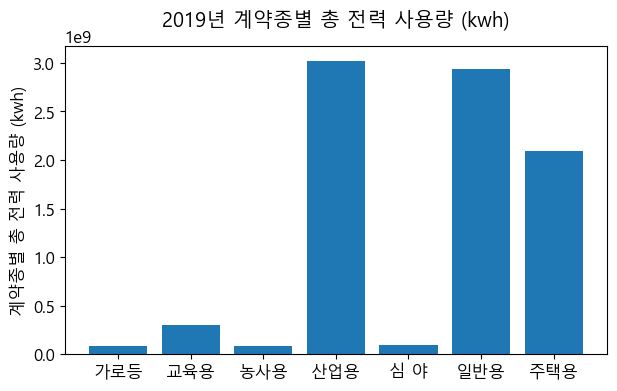

In [33]:
plt.figure(figsize=(7,4))
plt.bar(sumkwh19_df2.index, height=sumkwh19_df2['사용량(kWh)'])
plt.title('2019년 계약종별 총 전력 사용량 (kwh)',pad = 15)
plt.ylabel('계약종별 총 전력 사용량 (kwh)')
plt.show()

In [26]:
sumplot_19 = df_2.loc[df_2['년']=='2019'][['계약구분','사용량(kWh)','월']].pivot_table(index=['월'], columns='계약구분', values = '사용량(kWh)',aggfunc='sum')
sumplot_19 = sumplot_19[['가로등', '교육용', '농사용', '산업용', '심 야', '일반용', '주택용']]
sumplot_20 = df_2.loc[df_2['년']=='2020'][['계약구분','사용량(kWh)','월']].pivot_table(index=['월'], columns='계약구분', values = '사용량(kWh)',aggfunc='sum')
sumplot_20 = sumplot_20[['가로등', '교육용', '농사용', '산업용', '심 야', '일반용', '주택용']]
sumplot_21 = df_2.loc[df_2['년']=='2021'][['계약구분','사용량(kWh)','월']].pivot_table(index=['월'], columns='계약구분', values = '사용량(kWh)',aggfunc='sum')
sumplot_21 = sumplot_21[['가로등', '교육용', '농사용', '산업용', '심 야', '일반용', '주택용']]
sumplot_22 = df_2.loc[df_2['년']=='2022'][['계약구분','사용량(kWh)','월']].pivot_table(index=['월'], columns='계약구분', values = '사용량(kWh)',aggfunc='sum')
sumplot_22 = sumplot_22[['가로등', '교육용', '농사용', '산업용', '심 야', '일반용', '주택용']]

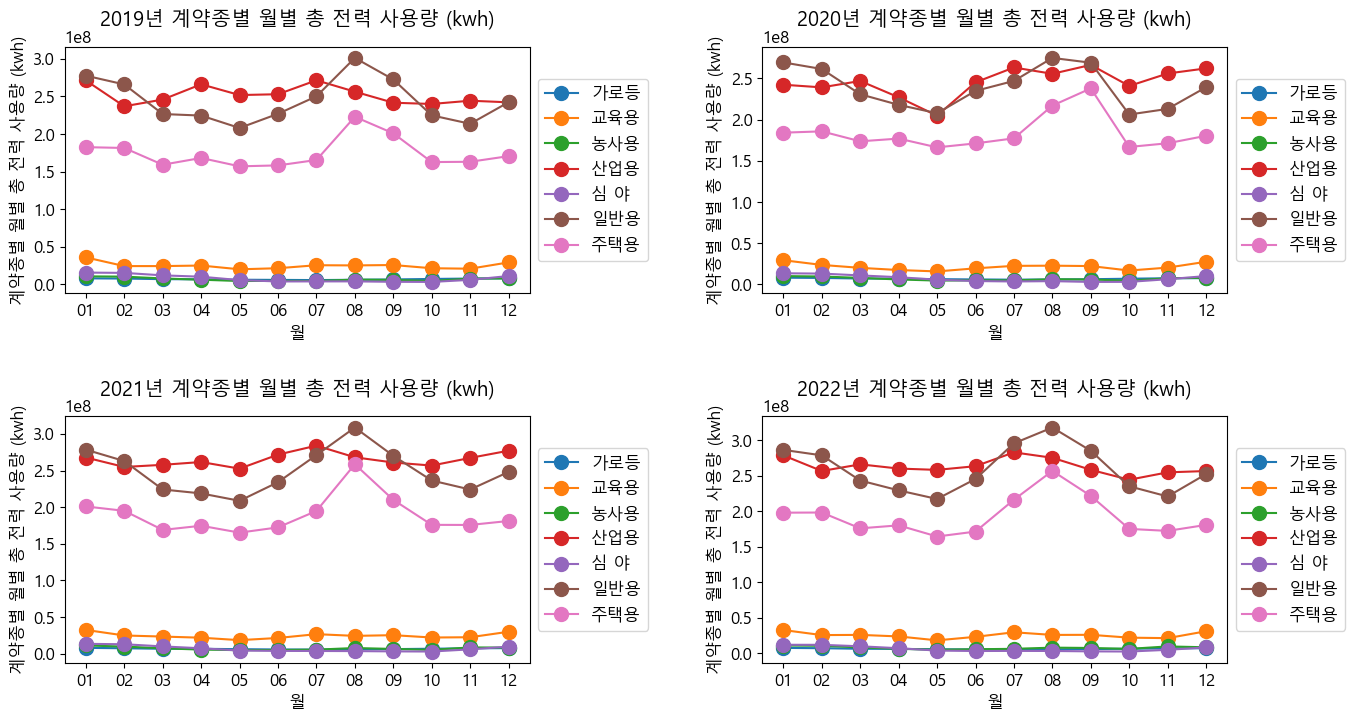

In [27]:
plt.figure(figsize=(15,8))
plt.subplots_adjust(hspace=0.5,wspace=0.5)
plt.subplot(2,2,1)
plt.plot(sumplot_19, marker = 'o', markersize=10)
plt.legend(sumplot_19.columns,loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('2019년 계약종별 월별 총 전력 사용량 (kwh)',pad = 15)
plt.xlabel('월')
plt.ylabel('계약종별 월별 총 전력 사용량 (kwh)')

plt.subplot(2,2,2)
plt.plot(sumplot_20, marker = 'o', markersize=10)
plt.legend(sumplot_20.columns,loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('2020년 계약종별 월별 총 전력 사용량 (kwh)',pad = 15)
plt.xlabel('월')
plt.ylabel('계약종별 월별 총 전력 사용량 (kwh)')

plt.subplot(2,2,3)
plt.plot(sumplot_21, marker = 'o', markersize=10)
plt.legend(sumplot_21.columns,loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('2021년 계약종별 월별 총 전력 사용량 (kwh)',pad = 15)
plt.xlabel('월')
plt.ylabel('계약종별 월별 총 전력 사용량 (kwh)')

plt.subplot(2,2,4)
plt.plot(sumplot_22, marker = 'o', markersize=10)
plt.legend(sumplot_22.columns,loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('2022년 계약종별 월별 총 전력 사용량 (kwh)',pad = 15)
plt.xlabel('월')
plt.ylabel('계약종별 월별 총 전력 사용량 (kwh)')

plt.show()